# Laboratorio 2
- Mark Albrand - 21004
- Jimena Hernandez -21199

## 2.1 Crecimiento Poblacional

Considere el siguiente modelo de crecimiento poblacional
 ```dy/dx k(1- y/N)y```

Después de 4 días, una población inicial de mariposas de 15 crece a 56. Si el ecosistema restringido alberga 300 mariposas, ¿cuántas mariposas habrá en 12 días? 


In [40]:
# resolver la ecuación con el método de euler y scipy.optimize

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve


In [41]:
N = 300 # Mariposas que alberga el ecosistema
y_i = 15 #Población inicial de mariposas
y_4 = 56 #Población de mariposas en el cuarto día
days = 12 # Días a simular


In [42]:
# Función que representa el Método de Euler
def euler_method(k, y0, h, t_end):
    t = np.arange(0, t_end + h, h)
    y = np.zeros(t.shape)
    y[0] = y0
    
    for i in range(1, len(t)):
        y[i] = y[i-1] + h * k * (1 - y[i-1] / N) * y[i-1]  # Ecuación dy/dx = k(1 - y/N)y
    
    return y

# Función para encontrar el valor de k
def objective(k):
    h = 0.01
    y = euler_method(k, y_i, h, 4)
    return y[-1] - y_4

k_initial = 0.1
k = fsolve(objective, k_initial)[0]

# 12 días
h = 0.01
y12 = euler_method(k, y_i, h, days)[-1]

print(f'El valor de k es: {k:.4f}')
print(f'La población de mariposas en el día 12 es: {y12:.2f}')

El valor de k es: 0.3687
La población de mariposas en el día 12 es: 244.27


/var/folders/gg/jfywq98d2qb3fdf1wqfhvk3m0000gn/T/ipykernel_74066/3262350250.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = y[i-1] + h * k * (1 - y[i-1] / N) * y[i-1]  # Ecuación dy/dx = k(1 - y/N)y


Suponiendo que la población de mariposas crece más rápido cuando hay 150 mariposas, ¿cuándo sucede esto?

In [43]:
# Tiempo para alcanzar 150 mariposas

def find_population(k, target, y0, h):
    t = 0
    y = y0
    while y < target:
        y += h * k * (1 - y / N) * y
        t += h
    return t

target = 150
t = find_population(k, target, y_i, h)

print(f'El tiempo para alcanzar {target} mariposas es: {t:.2f} días')


El tiempo para alcanzar 150 mariposas es: 8.00 días


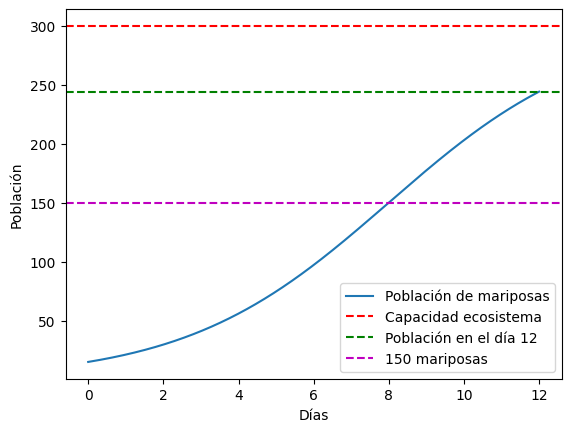

In [44]:
# graficas
y = euler_method(k, y_i, h, days)
t = np.arange(0, days + h, h)

plt.plot(t, y, label='Población de mariposas')
plt.axhline(y=N, color='r', linestyle='--', label='Capacidad ecosistema')
plt.axhline(y=y12, color='g', linestyle='--', label='Población en el día 12')
plt.axhline(y=target, color='m', linestyle='--', label='150 mariposas')
plt.xlabel('Días')
plt.ylabel('Población')
plt.legend()
plt.show()

## 2.2 Crecimiento Epidemiológico
En un pueblo aislado se propaga una enfermedad según el modelo SIR. Inicialmente hay 990 individuos susceptibles (S), 10 individuos infectados (I) y 0 individuos recuperados (R). La tasa de infección (𝛽) es 0.3 y la tasa
de recuperación (𝛾) es 0.1. Utilizando el método de Euler, estime el número de individuos susceptibles, infectados y recuperados durante un período de 50 días. Utilice un tamaño de paso (Δt) de 0.1 días.

*Nota: Asegúrese de que las poblaciones nunca sean cero. Además, calcule las derivadas adecuadamente dentro del ciclo*


In [45]:
individuos_s0 = 990 # Individuos susceptibles inicial
individuos_i0 = 10 # Individuos infectados inicial
individuos_r0 = 0 # Individuos recuperados inicial
N = individuos_s0 + individuos_i0 + individuos_r0 # Población total

tasa_infeccion = 0.3 # Tasa de infección (beta)
tasa_recuperacion = 0.1 # Tasa de recuperación (gamma)

dt = 0.01 # Paso de tiempo
dias = 50 # Días a simular

In [46]:
steps = int(dias / dt)  # Número de pasos

t = np.linspace(0, dias, steps + 1)

s = np.zeros(t.shape) # Vector de susceptibles
i = np.zeros(t.shape) # Vector de infectados
r = np.zeros(t.shape) # Vector de recuperados

# Inicializar los valores de S0, I0, R0
s[0] = individuos_s0
i[0] = individuos_i0
r[0] = individuos_r0


In [47]:
# Calculo valores siguientes
for n in range(steps):
    s[n + 1] = s[n] - dt * tasa_infeccion * s[n] * i[n] / N
    i[n + 1] = i[n] + dt * (tasa_infeccion * s[n] * i[n] / N - tasa_recuperacion * i[n])
    r[n + 1] = r[n] + dt * tasa_recuperacion * i[n]

print (f'El número de individuos infectados en el día 50 es: {i[-1]:.0f}')
print (f'El número de individuos recuperados en el día 50 es: {r[-1]:.0f}')
print (f'El número de individuos susceptibles en el día 50 es: {s[-1]:.0f}')

El número de individuos infectados en el día 50 es: 88
El número de individuos recuperados en el día 50 es: 830
El número de individuos susceptibles en el día 50 es: 82


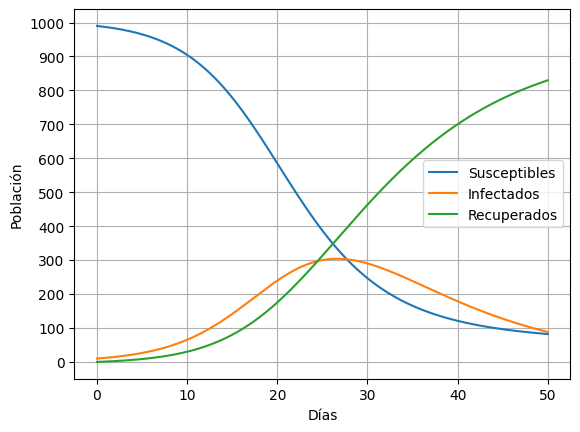

In [48]:
# Graficar resultados
plt.plot(t, s, label='Susceptibles')
plt.plot(t, i, label='Infectados')
plt.plot(t, r, label='Recuperados')
plt.xlabel('Días')
plt.ylabel('Población')
plt.legend()
plt.yticks(np.arange(0, N + 1, 100))
plt.grid()
plt.show()